In [33]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv(r"/kaggle/input/heart-failure-prediction/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


****
## Data Visualization ##
****

In [36]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

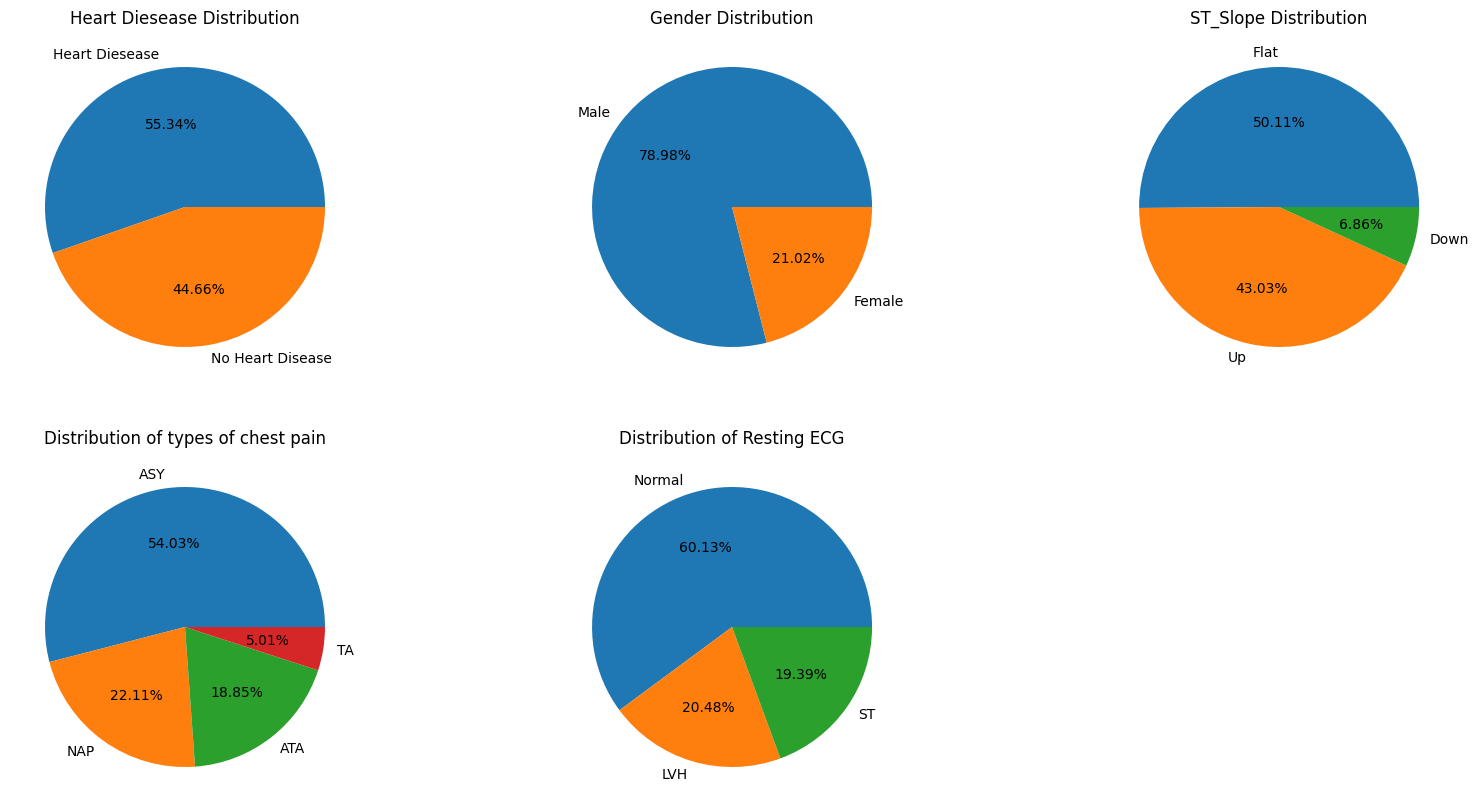

In [38]:
tdf=df['HeartDisease'].value_counts().reset_index()
tdf1=df['Sex'].value_counts().reset_index()
tdf2=df['ChestPainType'].value_counts().reset_index()
tdf3=df['RestingECG'].value_counts().reset_index()
tdf4=df['ST_Slope'].value_counts().reset_index()
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].pie(x=tdf['count'],labels=['Heart Diesease','No Heart Disease'],autopct='%.2f%%')
axes[0][0].set_title("Heart Diesease Distribution")
axes[0][1].pie(x=tdf1['count'],labels=['Male','Female'],autopct='%.2f%%')
axes[0][1].set_title("Gender Distribution")
axes[0][2].pie(x=tdf4['count'],labels=tdf4['ST_Slope'],autopct='%.2f%%')
axes[0][2].set_title("ST_Slope Distribution")
axes[1][0].pie(x=tdf2['count'],labels=tdf2['ChestPainType'],autopct='%.2f%%')
axes[1][0].set_title("Distribution of types of chest pain")
axes[1][1].pie(x=tdf3['count'],labels=tdf3['RestingECG'],autopct='%.2f%%')
axes[1][1].set_title("Distribution of Resting ECG")
axes[1][2].set_visible(False)
plt.show()

1. The dataset is balanced with respect to the target variable, this makes our job a lot easier to predict :)
2. The Gender distribution is skewed towards Males
3. The most common type of chest pain is ASY (asymptomatic) in this dataset followed by NAP (non-anginal pain)
4. Resting ECG is normal in 60% of the cases in this dataset

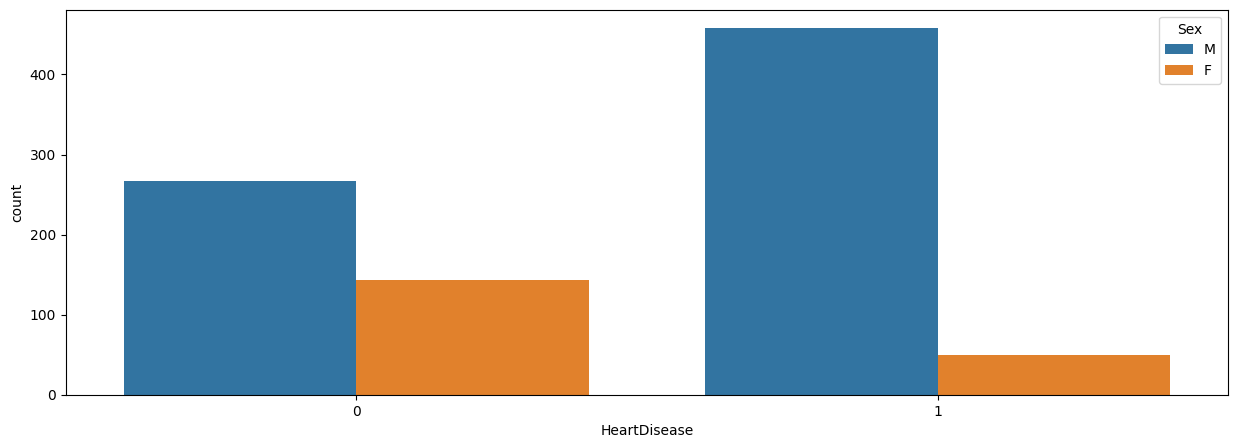

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='HeartDisease',hue='Sex')
plt.show()

1. The above graph shows us that Males have a Higher risk of getting a Heart Disease than the Females
2. This might be a good find but we need to keep in mind that the Males make up around 79% of the data so we use proportions. Visualized in the next graph

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


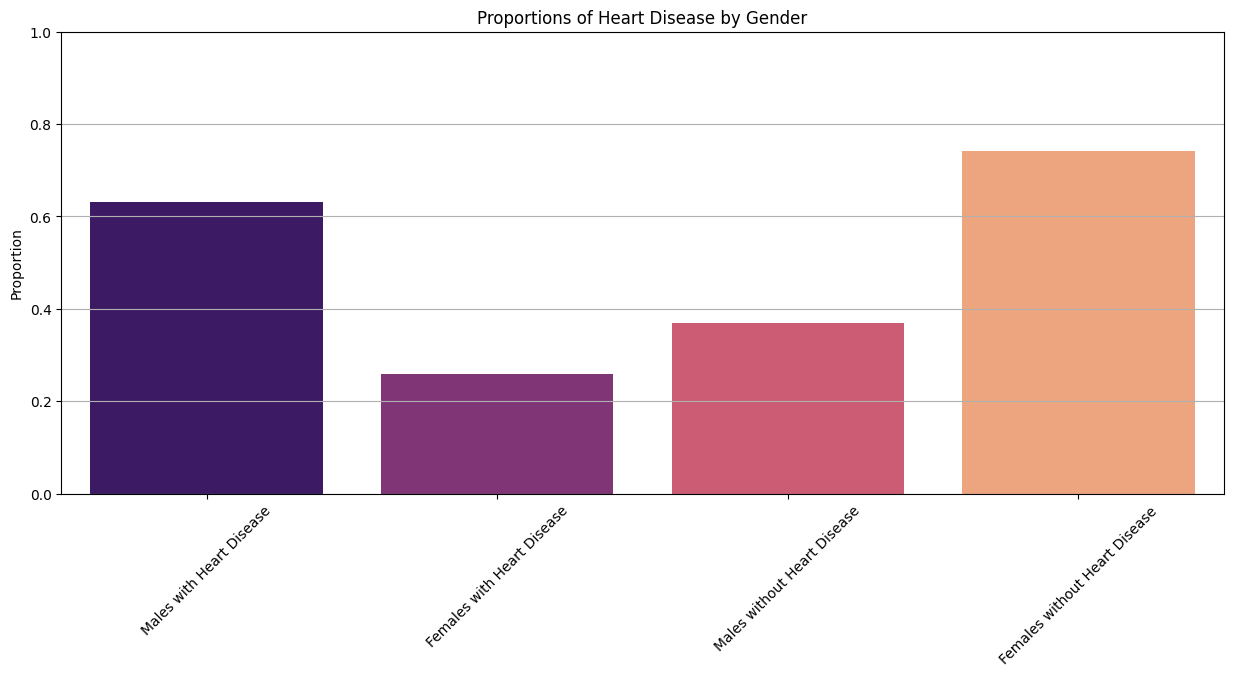

In [40]:
c=df.loc[(df['HeartDisease']==1)&(df['Sex']=='M')].shape[0]
c1=df.loc[(df['HeartDisease']==1)&(df['Sex']=='F')].shape[0]
c2=df.loc[(df['HeartDisease']==0)&(df['Sex']=='M')].shape[0]
c3=df.loc[(df['HeartDisease']==0)&(df['Sex']=='F')].shape[0]
total_counts = df['Sex'].value_counts()
proportions = [
    c/total_counts['M'],  
    c1/total_counts['F'],  
    c2/total_counts['M'],  
    c3/total_counts['F']   
]
categories = [
    'Males with Heart Disease',
    'Females with Heart Disease',
    'Males without Heart Disease',
    'Females without Heart Disease'
]
plt.figure(figsize=(15, 6))
sns.barplot(x=categories, y=proportions, palette='magma')
plt.title('Proportions of Heart Disease by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

1. The analysis indicates a higher prevalence of heart disease among males compared to females.
2. In contrast, the data reveals that there are more females without heart disease than their male counterparts. This suggests a notable gender difference in the absence of heart disease, highlighting that females exhibit a lower incidence of heart disease in the studied population.

This graph correctly provides us with the missing information the previous countplot could not provide us with

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

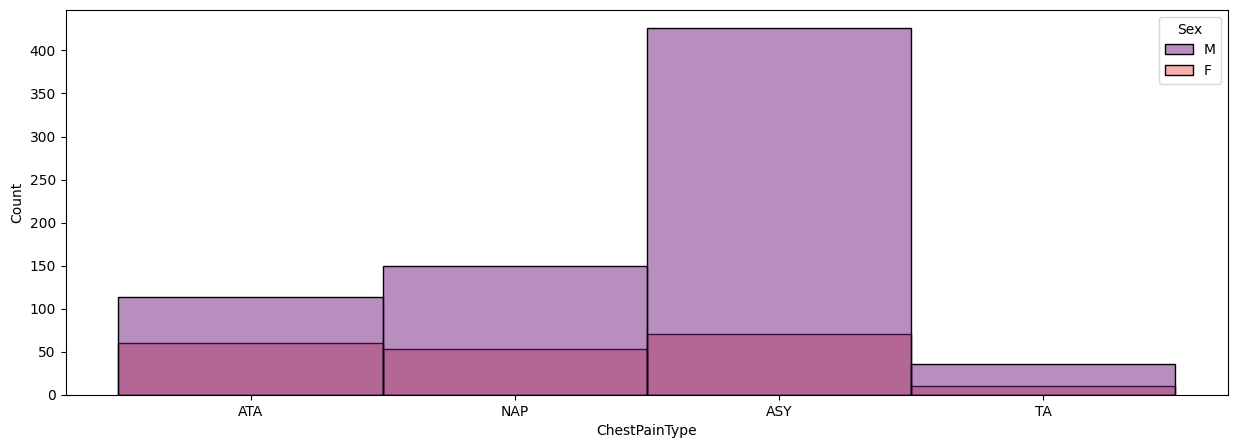

In [41]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='ChestPainType',hue='Sex',palette='magma')
plt.show()

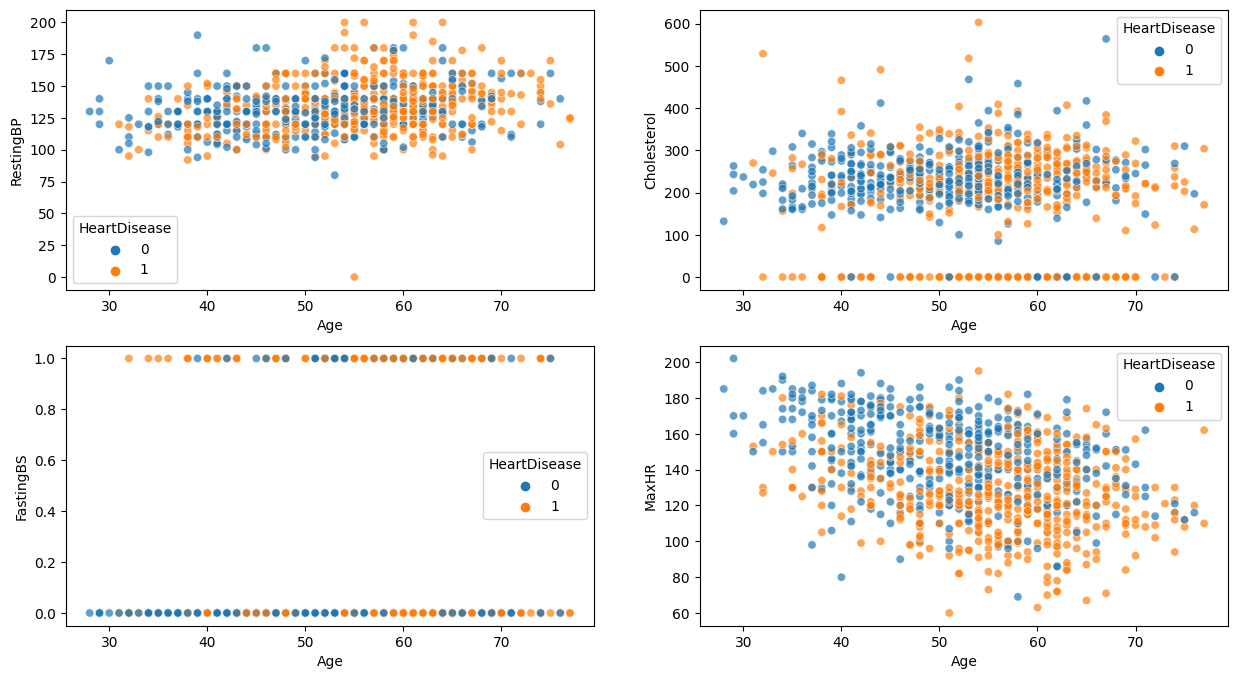

In [42]:
fig,axes=plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=df,x='Age',y='RestingBP',ax=axes[0][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='Cholesterol',ax=axes[0][1],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='FastingBS',ax=axes[1][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='MaxHR',ax=axes[1][1],hue='HeartDisease',alpha=0.7)
plt.show()

**Comprehensive Summary of Findings:**

1. MaxHR and FastingBS are the most important variables for predicting heart disease across all ages. Individuals with heart disease consistently exhibit lower MaxHR values and higher fasting blood sugar (FastingBS = 1).

2. Cholesterol and RestingBP become more important for identifying heart disease as individuals age:

   **Cholesterol:** Higher cholesterol levels are more frequently observed in older individuals (50+) with heart disease, but this pattern is not as clear in younger age groups.

   **RestingBP:** Individuals with heart disease show higher RestingBP values, especially in the age group 50-70, making it a more relevant factor in older populations.

4. Fasting Blood Sugar (FastingBS) shows a consistent and strong link to heart disease across all ages, regardless of other factors.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

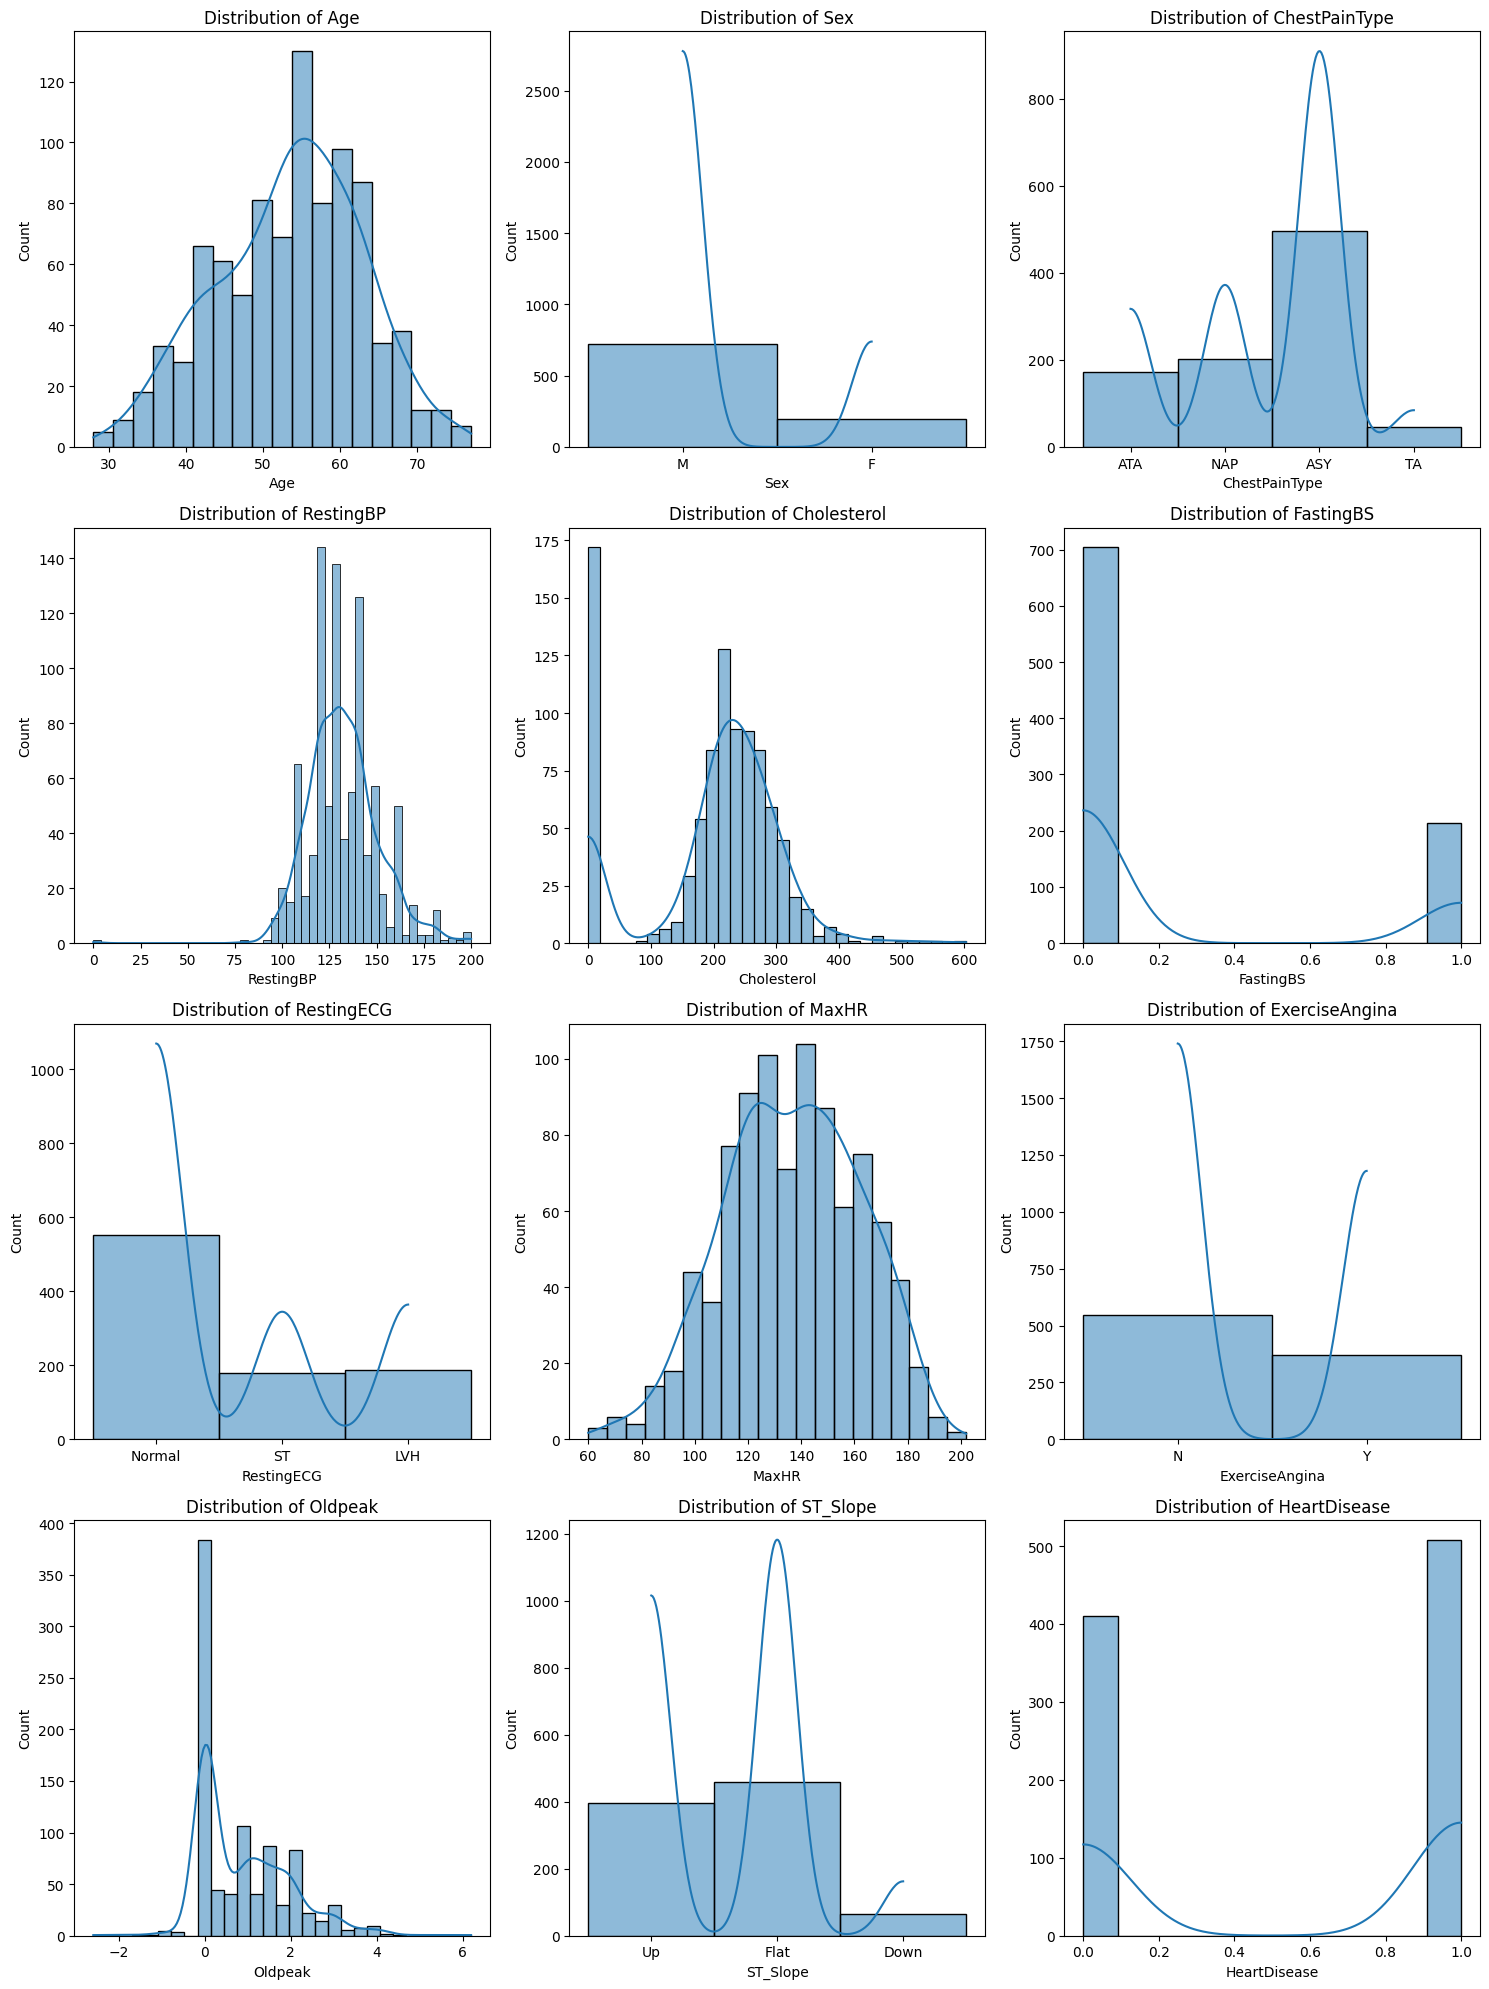

In [43]:
plt.figure(figsize=(15,20))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

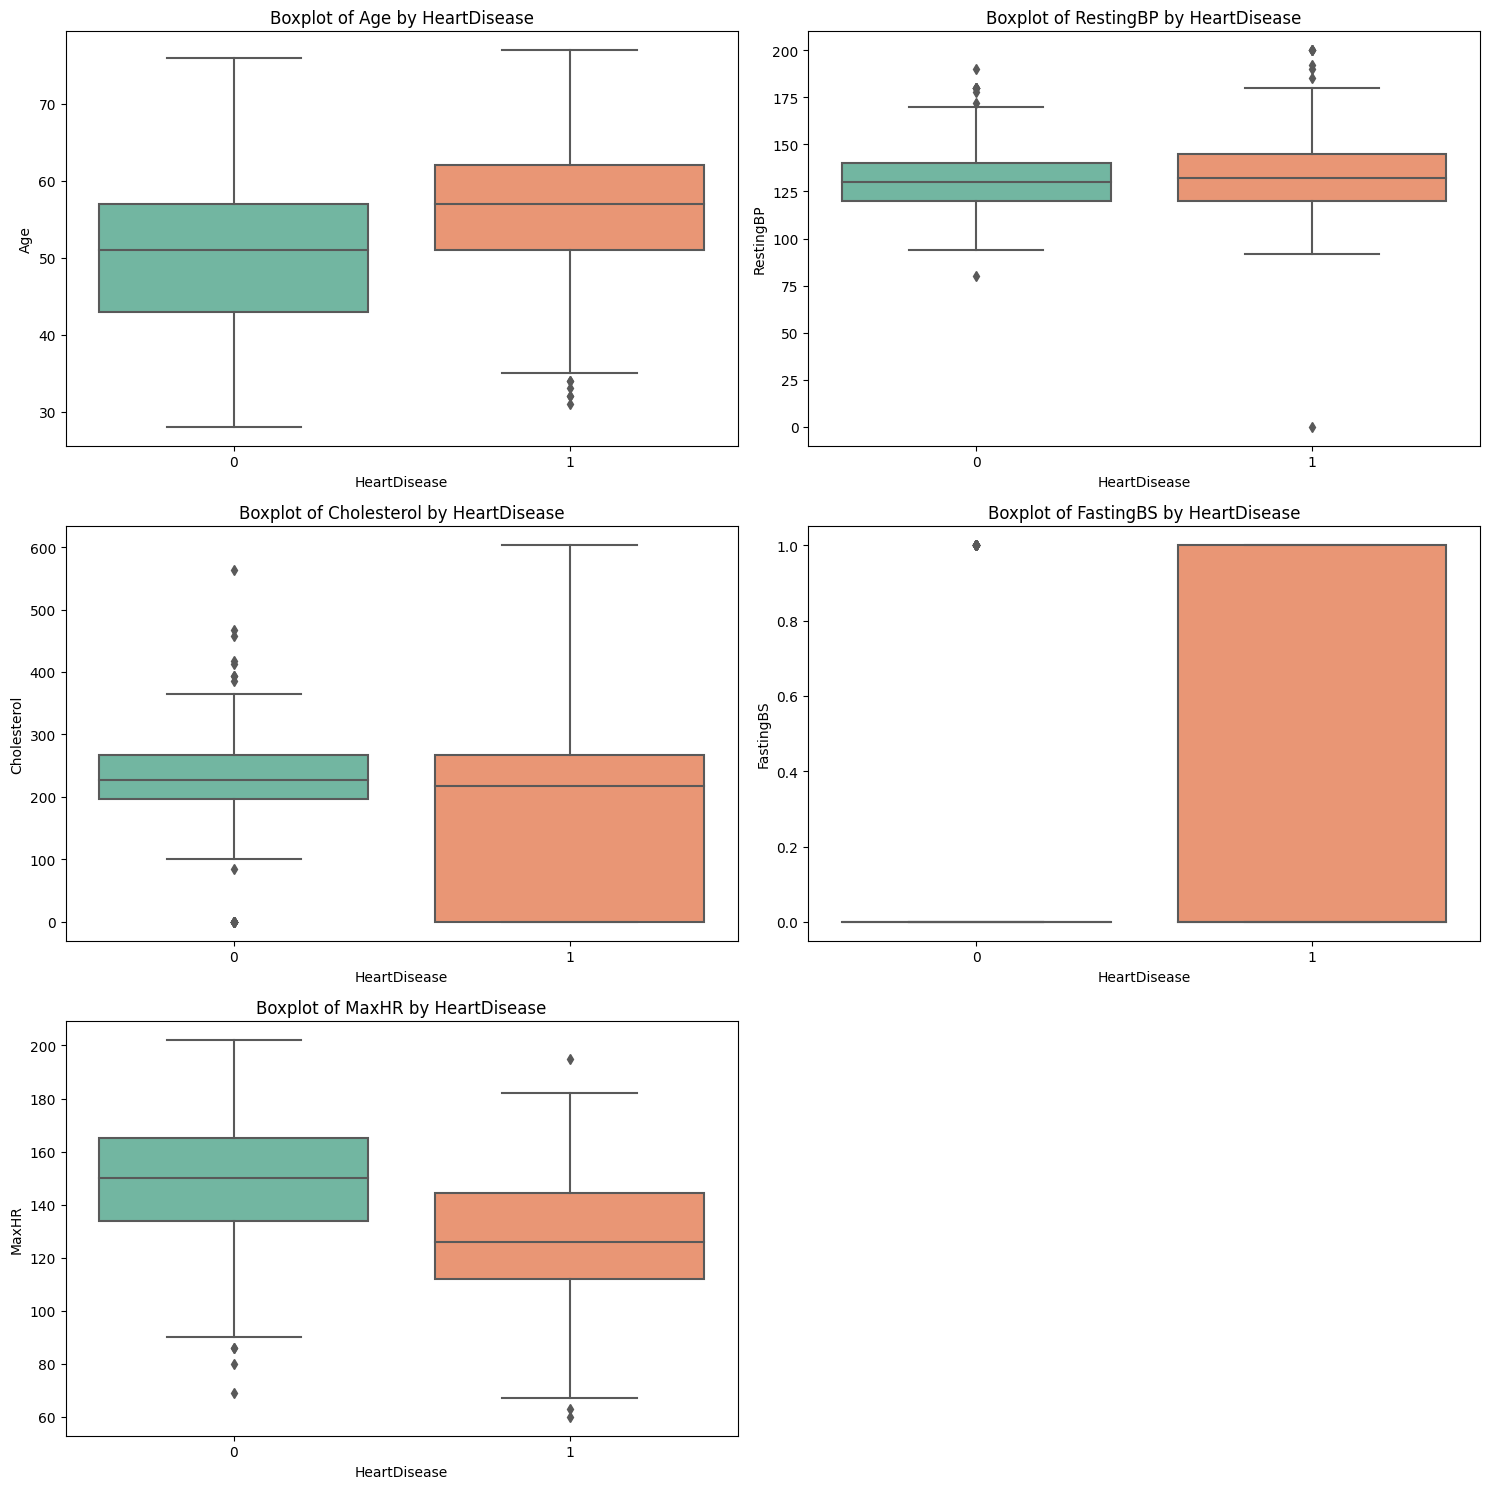

In [44]:
plt.figure(figsize=(15,15))

for i, col in enumerate(df.columns[df.dtypes=='int64'].drop('HeartDisease'), 1):
    plt.subplot(3, 2, i)
    plt.title(f"Boxplot of {col} by HeartDisease")
    sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
    plt.tight_layout()

plt.show()

1. Individuals with heart disease (orange) are generally older, with a median around 58. Those without heart disease (green) have a lower median age, around 52.

2. People with heart disease show a higher range and more outliers in RestingBP, indicating that elevated blood pressure may be a contributing factor.
   
3. Cholesterol levels are notably higher in individuals with heart disease, pointing to it as a potential risk factor.

4. Fasting Blood Sugar is a clear indicator of heart disease, as all non-heart disease individuals have low fasting blood sugar levels, while those with heart disease predominantly have elevated levels.

5. MaxHR for individuals without heart disease (0): The median MaxHR is higher, around 155 bpm, with a more concentrated range of values between approximately 130 and 165 bpm.

   MaxHR for individuals with heart disease (1): The median MaxHR is lower, around 140 bpm, with a broader range of values, showing more variation and outliers. Conclusion: People with heart disease tend to have lower MaxHR compared to those without heart disease.

****
## Data Preprocessing and Preparation ##
****

In [45]:
from sklearn.preprocessing import LabelEncoder #I will be using Tree based classification algos so not using One Hot Encoding
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [47]:
df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [48]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


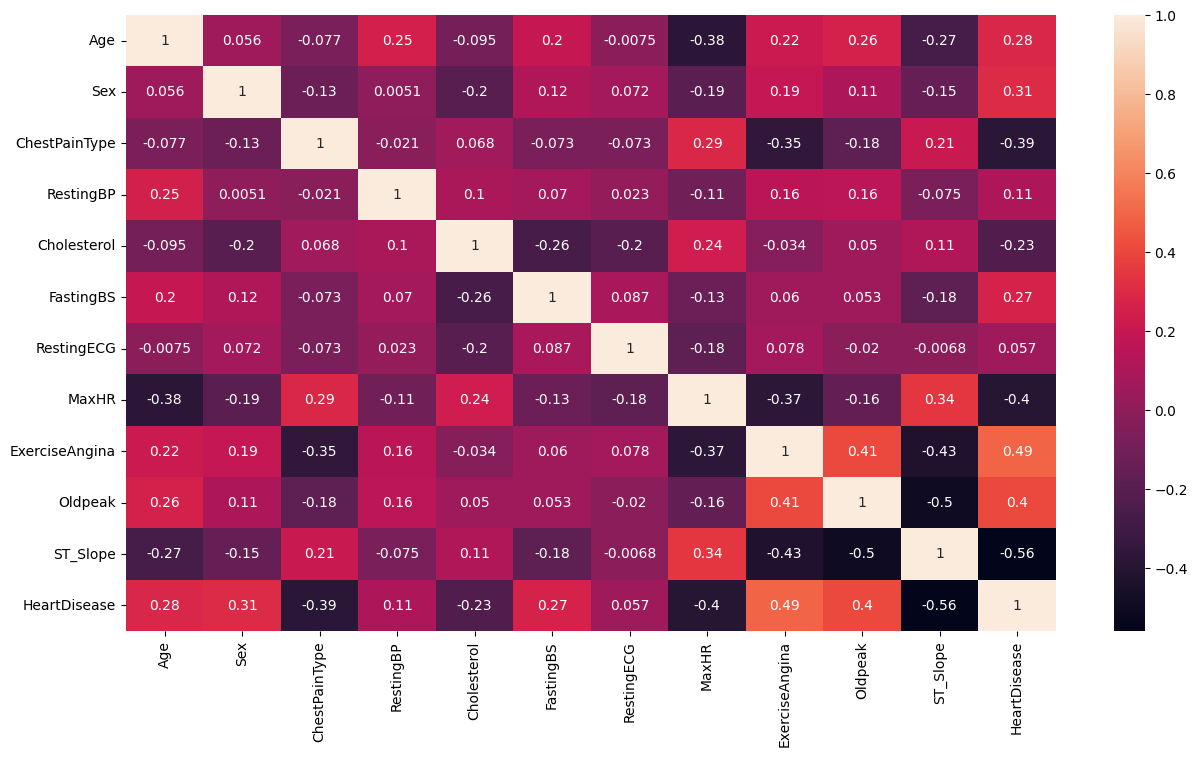

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [50]:
x=df.drop(columns='HeartDisease')
y=df['HeartDisease']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'MI Score': mi})
mi_df=mi_df.sort_values(by='MI Score', ascending=False)
mi_df

,Feature,MI Score
10,ST_Slope,0.210208
8,ExerciseAngina,0.147515
2,ChestPainType,0.126176
9,Oldpeak,0.105362
7,MaxHR,0.093953
4,Cholesterol,0.067744
1,Sex,0.051465
0,Age,0.049967
5,FastingBS,0.032845
3,RestingBP,0.025201


In [51]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
## Models ##
****

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

**Decision Tree Classifier**

In [53]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.001937984496124031}
0.8488064791133845


In [54]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
       'max_features':['sqrt','log2',None],'max_depth':list(np.arange(1,31))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_
pred_t=ndt.predict(x_t)
pred=ndt.predict(x_te)

{'min_samples_split': 25, 'min_samples_leaf': 16, 'max_features': None, 'max_depth': 4, 'criterion': 'entropy'}
0.8560741687979541


**Random Forest Classifier**

In [55]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(2,101)),
       'max_depth':list(np.arange(1,51)),'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 58, 'min_samples_leaf': 22, 'max_depth': 5, 'criterion': 'entropy'}
0.8532182438192668


In [56]:
pred1_t=nrf.predict(x_t)
pred1=nrf.predict(x_te)

**AdaBoost Classifier**

In [57]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 100, 'learning_rate': 0.16}
0.8618925831202044


In [58]:
pred2_t=nada.predict(x_t)
pred2=nada.predict(x_te)

In [59]:
tdf=pd.DataFrame({'Classification Algorithms':['Decsion Tree Classifier','Random Forest Classifier','AdaBoostClassifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t)],
                  'Training Precision':[precision_score(y_t,pred_t),precision_score(y_t,pred1_t),precision_score(y_t,pred2_t)],
                  'Training Recall':[recall_score(y_t,pred_t),recall_score(y_t,pred1_t),recall_score(y_t,pred2_t)],
                  'Training F1 Score':[f1_score(y_t,pred_t),f1_score(y_t,pred1_t),f1_score(y_t,pred2_t)]})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Decsion Tree Classifier,0.866279,0.843458,0.935233,0.886978
1,Random Forest Classifier,0.869186,0.855769,0.922280,0.887781
2,AdaBoostClassifier,0.869186,0.871859,0.898964,0.885204


### **The evaluation of three classification algorithms reveals the following insights:**

1. Random Forest Classifier and AdaBoostClassifier both achieved the highest training accuracy (86.92%), indicating strong predictive performance. However, Random Forest slightly outperformed AdaBoost in training precision (85.58% vs. 87.19%).

2. Decision Tree Classifier demonstrated slightly lower training accuracy (86.63%) compared to the other two models. Despite having the highest training recall (93.52%), it may be overfitting to the training data, as reflected in the other metrics.

3. Training Precision for AdaBoost is the highest among the three algorithms, suggesting it is effective in minimizing false positives.

**All models exhibit a good balance between precision and recall, with F1 scores indicating competitive performance.**







In [60]:
tedf=pd.DataFrame({'Classification Algorithms':['Decsion Tree Classifier','Random Forest Classifier','AdaBoostClassifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1),accuracy_score(y_te,pred2)],
                  'Testing Precision':[precision_score(y_te,pred),precision_score(y_te,pred1),precision_score(y_te,pred2)],
                  'Testing Recall':[recall_score(y_te,pred),recall_score(y_te,pred1),recall_score(y_te,pred2)],
                  'Testing F1 Score':[f1_score(y_te,pred),f1_score(y_te,pred1),f1_score(y_te,pred2)]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Decsion Tree Classifier,0.800000,0.763889,0.901639,0.827068
1,Random Forest Classifier,0.865217,0.832117,0.934426,0.880309
2,AdaBoostClassifier,0.860870,0.846154,0.901639,0.873016


 **The performance analysis of the classification algorithms on the testing dataset yields the following insights:**

1. Random Forest Classifier achieved the highest testing accuracy (86.52%) and F1 score (88.03%), indicating it generalizes well to unseen data and balances precision and recall effectively. It also had the highest recall (93.44%), demonstrating its strength in correctly identifying positive instances.

2. AdaBoostClassifier closely followed with a testing accuracy of 86.09% and a good F1 score of 87.30%. Its precision (84.62%) indicates it performs well in minimizing false positives, making it a reliable choice as well.

3. Decision Tree Classifier had the lowest testing accuracy (80.00%) and F1 score (82.71%), highlighting potential overfitting during training. Although it exhibited good recall (90.16%), its lower precision (76.39%) suggests a higher rate of false positives.


In [61]:
print('Decison Tree Classifier\n\n')
print(classification_report(y_te,pred))
print('\n\n\nRandom Forest Classifier\n\n')
print(classification_report(y_te,pred1))
print('\n\n\nAdaBoost Classifier\n\n')
print(classification_report(y_te,pred2))

Decison Tree Classifier


              precision    recall  f1-score   support

           0       0.86      0.69      0.76       108
           1       0.76      0.90      0.83       122

    accuracy                           0.80       230
   macro avg       0.81      0.79      0.79       230
weighted avg       0.81      0.80      0.80       230




Random Forest Classifier


              precision    recall  f1-score   support

           0       0.91      0.79      0.85       108
           1       0.83      0.93      0.88       122

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230




AdaBoost Classifier


              precision    recall  f1-score   support

           0       0.88      0.81      0.85       108
           1       0.85      0.90      0.87       122

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86    

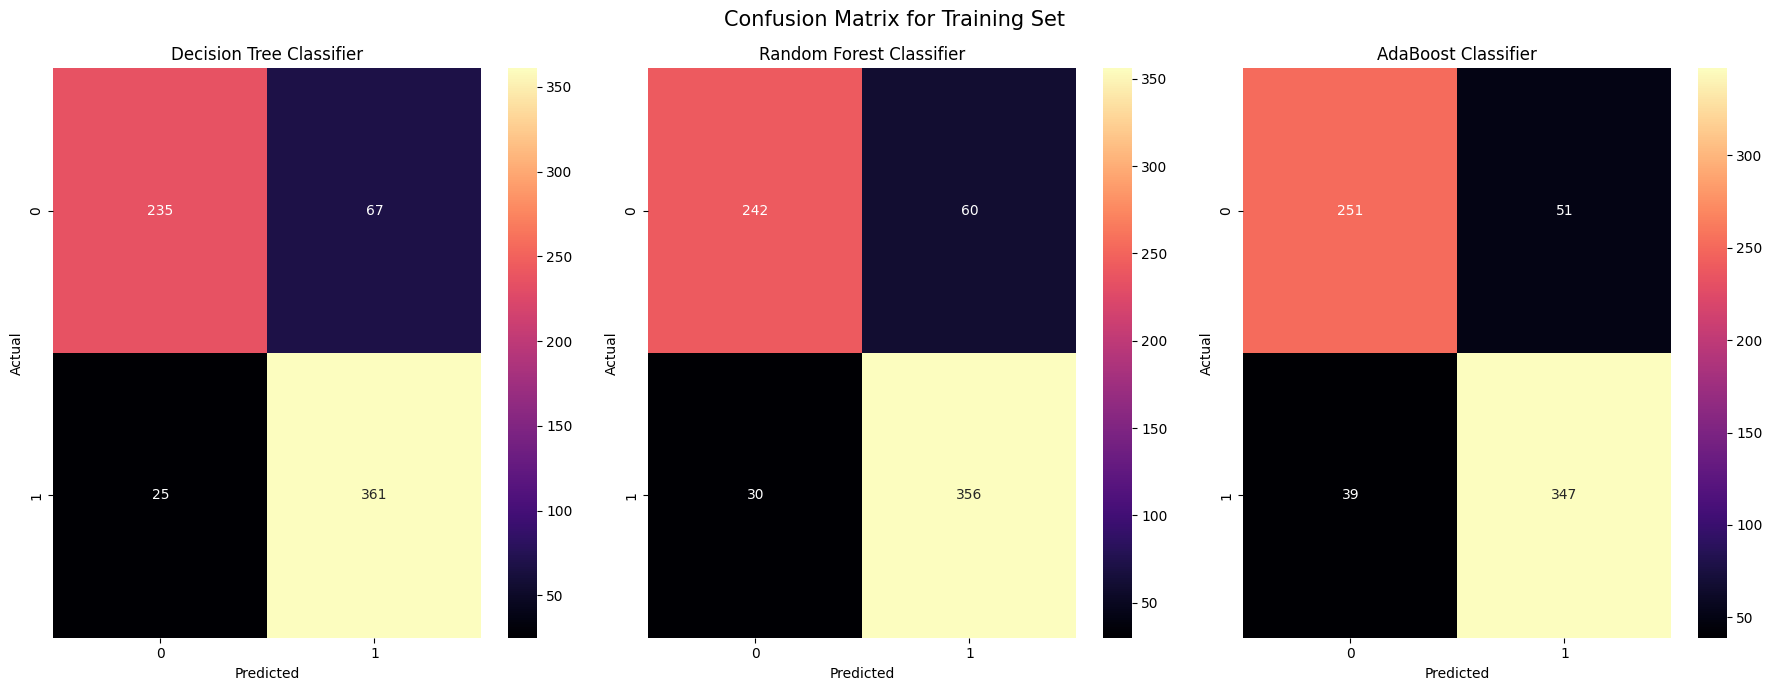

In [62]:
cm_tree=confusion_matrix(y_t,pred_t)
cm_rf=confusion_matrix(y_t,pred1_t)
cm_adaboost=confusion_matrix(y_t,pred2_t)
fig, axes=plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(cm_tree,annot=True,fmt='d',cmap='magma',ax=axes[0])
axes[0].set_title('Decision Tree Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf, annot=True,fmt='d',cmap='magma',ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm_adaboost,annot=True,fmt='d',cmap='magma',ax=axes[2])
axes[2].set_title('AdaBoost Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.suptitle('Confusion Matrix for Training Set',fontsize=15)
plt.tight_layout()
plt.show()

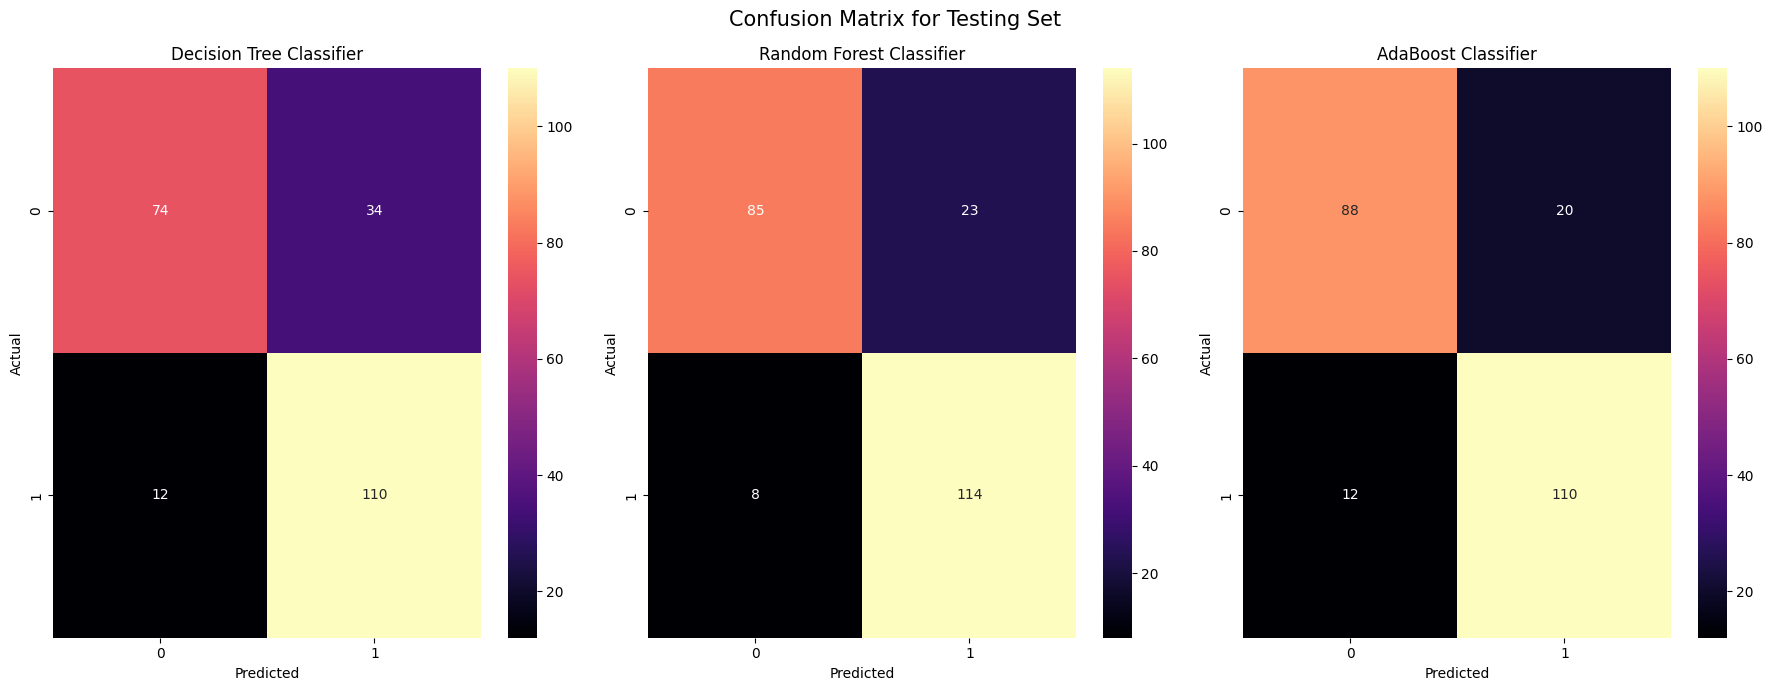

In [63]:
cm_tree=confusion_matrix(y_te,pred)
cm_rf=confusion_matrix(y_te,pred1)
cm_adaboost=confusion_matrix(y_te,pred2)
fig, axes=plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(cm_tree,annot=True,fmt='d',cmap='magma',ax=axes[0])
axes[0].set_title('Decision Tree Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf, annot=True,fmt='d',cmap='magma',ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm_adaboost,annot=True,fmt='d',cmap='magma',ax=axes[2])
axes[2].set_title('AdaBoost Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.suptitle('Confusion Matrix for Testing Set',fontsize=15)
plt.tight_layout()
plt.show()

**Final Recommendation:**

1. Random Forest Classifier is the preferred model due to its superior testing performance across all metrics, especially in terms of accuracy and recall.
2. AdaBoostClassifier is also a viable option, particularly where precision is important.
3. Decision Tree Classifier may not be suitable for this task due to its reduced generalization capability, as indicated by its lower performance on the testing set.